# <center> Computational Intelligence Course </center>
# <center> Homework 1.2: Logistic Regression</center>

In this exercise, you will implement logistic regression and apply it to two different datasets. <br>
All the information you need for solving this assignment is in this notebook, and all the code you will be implementing will take place within this notebook.

Before we begin with the exercises, we need to import all libraries required for this programming exercise.

### 1.1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1: Logistic Regression
In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university. Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision. Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams.

### 1.2. Loading the Data
The following cell will load the data and corresponding labels:

In [2]:
df = pd.read_csv("ex2data1.txt", header=None)
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### 1.3. Plotting the Data
We start the exercise by first plotting the data to understand the the problem we are working with.<br>
Plotting data with red '+' indicating (y = 1) examples and blue 'o' indicating (y = 0) examples.

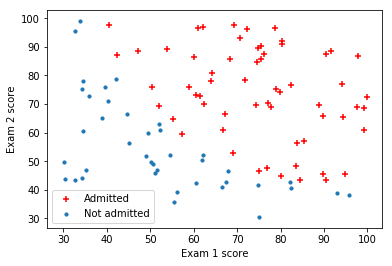

In [3]:
pos , neg = (y==1).reshape(100,1) , (y==0).reshape(100,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(["Admitted","Not admitted"],loc=0)

### 1.4. Compute the Cost Function and Gradient

In this part of the exercise, you will implement the cost and gradient for logistic regression. You neeed to complete the codes.

First of all, you should implement sigmoid function:

$$ g(z) = \frac{1}{(1+e^{-z})}$$
and then, complete the cost function and derivatives:
$$J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{(i)}log(h_{\Theta}(x^{(i)})) - (1 - y^{(i)})log(1 - (h_{\Theta}(x^{(i)}))]$$

$$ \frac{\partial J(\Theta)}{\partial \Theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_\Theta(x)$.

In [4]:
def sigmoid(z):
    """
    return the sigmoid of z
    """
    g = np.zeros(z.shape)
    
    # ====================== YOUR CODE HERE ======================
    g = 1 / (1 + (np.exp(-1 * z)));
    # ============================================================
    
    return g

In [5]:
def costFunction(theta, X, y):
    """
    Takes in numpy array theta, x and y and return the logistic regression cost function and gradient
    """
    
    m = len(y)
    
    J = 0
    grad = np.zeros(theta.shape)
    
    # ====================== YOUR CODE HERE ======================
    y = y.reshape((m, 1))
    h = sigmoid(np.dot(X , theta)).reshape(m,1);
    
    J = (-1 * (np.dot(np.log(h).transpose() , y) + np.dot(np.log(1 - h).transpose() , (1 - y))) / m)
    J = J.reshape(1)[0];
    
    grad = (np.dot(X.transpose(), (h - y))) / m;
    # ============================================================
    
    return J , grad

In [6]:
# For this function, you can use your codes in linear regression
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    # ====================== YOUR CODE HERE ======================
    X_norm = X;
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    
    
    X_norm = (X - mean) / std
    # ============================================================
    
    return X_norm , mean , std

In [7]:
# Compute and display initial cost and gradient
m , n = X.shape[0], X.shape[1]
X, X_mean, X_std = featureNormalization(X)
X = np.append(np.ones((m,1)),X,axis=1)
y = y.reshape(m,1)
initial_theta = np.zeros((n+1,1))
cost, grad = costFunction(initial_theta,X,y)

print("Cost at initial theta (zeros): ", cost)
print("Gradient at initial theta (zeros): ", grad)

Cost at initial theta (zeros):  0.6931471805599453
Gradient at initial theta (zeros):  [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


**Expected Output**: 

<table style="width:20%">
  <tr>
    <td>**cost**</td>
    <td> 0.693</td> 
  </tr>
  <tr>
    <td>**grad**</td>
    <td> [[-0.1000], [-0.2812], [-0.2509]]</td> 
  </tr>
</table>

### 1.5. Gradient Descent

Now, you will use gradient descent method to find the optimal parameters theta.

In [8]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m = len(y)
    J_history = []
        
    for i in range(num_iters):
        # ====================== YOUR CODE HERE ======================
        cost, grad = costFunction(theta, X, y)
        theta = theta - (alpha * (grad))
        J_history.append(cost)
        # ============================================================
    
    return theta , J_history

In [9]:
theta , J_history = gradientDescent(X, y, initial_theta, 1, 400)

In [10]:
print("Cost at theta found by gradient descent: ", J_history[-1])
print("Theta optimized by gradient descent: ",theta)

Cost at theta found by gradient descent:  0.20360044248226664
Theta optimized by gradient descent:  [[1.65947664]
 [3.8670477 ]
 [3.60347302]]


**Expected Output**: 

<table style="width:20%">
  <tr>
    <td>**cost**</td>
    <td> 0.203</td> 
  </tr>
  <tr>
    <td>**theta**</td>
    <td> [[1.65948], [3.8670], [3.6035]]</td> 
  </tr>
</table>

### 1.6. Plotting the decision boundary

From Machine Learning Resources:
    
$h_\Theta(x) = g(z)$, where g is the sigmoid function and $z = \Theta^Tx$

Since $h_\Theta(x) \geq 0.5$ is interpreted as predicting class "1", $g(\Theta^Tx) \geq 0.5$ or $\Theta^Tx \geq 0$ predict class "1" 

$\Theta_1 + \Theta_2x_2 + \Theta_3x_3 = 0$ is the decision boundary   

Since, we plot $x_2$ against $x_3$, the boundary line will be the equation $ x_3 = \frac{-(\Theta_1+\Theta_2x_2)}{\Theta_3}$

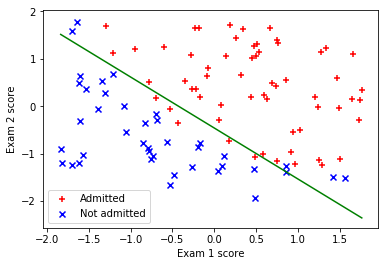

In [11]:
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value=-(theta[0] +theta[1]*x_value)/theta[2]
plt.plot(x_value,y_value, "g")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

### 1.7. Prediction & Accuracy
After learning the parameters, you'll like to use it to predict the outcomes on unseen data. In this part, you will use the logistic regression model to predict the probability that a student with score 45 on exam 1 and score 85 on exam 2 will be admitted.<br>
Furthermore, you will compute the accuracy of our model. Your task is to complete the code in predict function

In [12]:
def predict(theta,X):
    """
    take in numpy array of theta and X and predict the class 
    """
    
    # ====================== YOUR CODE HERE ======================
    predictions = np.round(sigmoid(np.dot(X, theta)))
    # ============================================================
    
    return predictions

In [13]:
x_test = np.array([45,85])
x_test = (x_test - X_mean)/X_std
x_test = np.append(np.ones(1),x_test)
prob = sigmoid(x_test.dot(theta))
print("For a student with scores 45 and 85, we predict an admission probability of", prob[0])

For a student with scores 45 and 85, we predict an admission probability of 0.7677628875792492


In [14]:
p = predict(theta, X)
print("Train Accuracy:", sum(p==y)[0],"%")

Train Accuracy: 89 %


**Expected Output**: 

<table style="width:20%">
  <tr>
    <td>**accuracy**</td>
    <td>89.0</td> 
  </tr>
</table>

## Part 2: Regularized Logistic regression
In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly. Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

### 2.1. Loading the Data
The first two columns contains the X values and the third column contains the label (y).

In [15]:
df = pd.read_csv("ex2data2.txt", header=None)
df.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [16]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

### 2.2. Plotting the Data

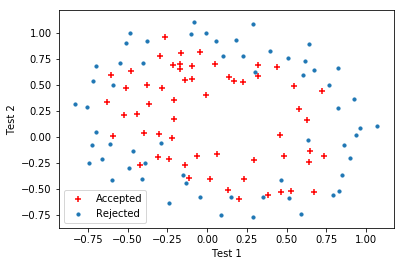

In [17]:
pos , neg = (y==1).reshape(118,1) , (y==0).reshape(118,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.legend(["Accepted","Rejected"],loc=0)

As the above figure shows, you are given a dataset with data points that are not linearly separable. However, you would still like to use logistic regression to classify the data points.
To do so, you introduce more features to use -- in particular, you add polynomial features to our data matrix (similar to polynomial regression).

### 2.3. Add Polynomial Features

In [18]:
def mapFeature(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    out = np.ones(len(x1)).reshape(len(x1),1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j).reshape(len(x1),1)
            out= np.hstack((out,terms))
    return out

In [19]:
# Note that mapFeature also adds a column of ones for us, so the intercept term is handled
X = mapFeature(X[:,0], X[:,1],6)

### 2.4. Computing Regularize Cost Function and Gradient

Now you will implement code to compute the cost function and gradient for regularized logistic regression. <br>
Recall that the regularized cost function in logistic regression is:
$$J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{(i)}log(h_{\Theta}(x^{(i)})) - (1 - y^{(i)})log(1 - (h_{\Theta}(x^{(i)}))] + \frac{\lambda}{2m} \sum_{j=1}^n \Theta_j^2$$

Note that you should not regularize the parameters $\theta_0$. The gradient of the cost function is a vector where the $j^{th}$ element is defined as follows:
$$ \frac{\partial J(\Theta)}{\partial \Theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)} + \frac{\lambda}{m}\Theta_j \;\;for\; j\geq 1$$

In [20]:
def costFunctionReg(theta, X, y ,Lambda):
    """
    Take in numpy array of theta, X, and y to return the regularize cost function and gradient
    of a logistic regression
    """
    
    m = len(y)
    
    J = 0
    grad = np.zeros(theta.shape)
    
    # ====================== YOUR CODE HERE ======================
    J, grad = costFunction(theta, X, y)
    
    J += (Lambda / (2 * m)) * np.dot(theta.transpose(), theta).reshape(1)[0]
    grad += (Lambda / m) * theta
    
    # ============================================================
    
    return J, grad

In [21]:
# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1))

# Set regularization parameter lambda to 1
Lambda = 1

#Compute and display initial cost and gradient for regularized logistic regression
cost, grad = costFunctionReg(initial_theta, X, y, Lambda)

In [22]:
print('Cost at initial theta (zeros): ' , cost)

Cost at initial theta (zeros):  0.6931471805599454


**Expected Output**: 

<table style="width:20%">
  <tr>
    <td>**cost**</td>
    <td> 0.693</td> 
  </tr>
</table>

### 2.5. Gradient Descent
Now, you will use gradient descent to learn the optimal parameters $\Theta$.

In [23]:
def gradientDescent(X, y, theta, alpha, num_iters, Lambda):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m = len(y)
    J_history =[]
    
    for i in range(num_iters):
        # ====================== YOUR CODE HERE ======================
        cost, grad = costFunctionReg(theta, X, y, Lambda)
        theta = theta - (alpha * (grad))
        J_history.append(cost)
        # ============================================================
    
    return theta , J_history

In [24]:
theta , J_history = gradientDescent(X, y, initial_theta, 1, 800, 0.2)

### 2.6. Plot Decision Boundary
Now, we plot the (non-linear) decision boundary that separates the positive and negative examples. 

In [25]:
def mapFeaturePlot(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)
            out= np.hstack((out,terms))
    return out

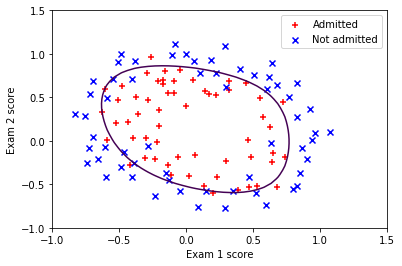

In [26]:
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")

# Plotting decision boundary

u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],6) @ theta 

plt.contour(u_vals,v_vals,z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

### 2.7. Prediction & Accuracy 

In [27]:
def predict(theta,X):
    """
    take in numpy array of theta and X and predict the class 
    """
    
    # ====================== YOUR CODE HERE ======================
    predictions = np.round(sigmoid(np.dot(X, theta)))
    # ============================================================
        
    return predictions

In [29]:
p = predict(theta,X)
print("Train Accuracy:", (sum(p==y[:,np.newaxis])/len(y) *100)[0],"%")

Train Accuracy: 83.89830508474576 %


**Expected Output**: 

<table style="width:20%">
  <tr>
    <td>**accuracy**</td>
    <td>83</td> 
  </tr>
</table>